# Problema: Dataset de pingüinos:

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset?


2. ¿Cuál es la longitud media del pico de los pingüinos de la especie Adelie?

3. ¿Cuál es la masa corporal promedio de los pingüinos de la especie Gentoo?

4. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos?

5. ¿Cuál es la isla con mayor número de pingüinos en el dataset?

6. ¿Cuál es la desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap?

7. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

8. ¿Cuál es la proporción de machos y hembras en la especie Adelie?

9. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

10. ¿Cuál es la distribución de la masa corporal entre las especies de pingüinos?

11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

12. ¿Cuántos pingüinos tienen una masa corporal superior a 5000 gramos?

13. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

14. ¿Cuál es la relación entre la longitud de la aleta y la masa corporal en los pingüinos de la especie Gentoo?

15. ¿Cuántos pingüinos tienen datos faltantes en alguna de sus características?

16. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

17. ¿Cuál es la diferencia en masa corporal promedio entre machos y hembras de la especie Chinstrap?

18. ¿Qué especie de pingüino tiene la longitud de aleta promedio más alta?

19. ¿Cuál es la longitud del pico más pequeña registrada en el dataset y de qué especie es?

20. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos de la especie Adelie?

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Cargar el dataset
df = sns.load_dataset('penguins')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Remover nulos
df.dropna(axis=0, inplace=True, ignore_index=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [ ]:
# punto 1
species_num = len(df.species.unique())
print("El número de especies distintas es", species_num)

El número de especies distintas es 3


In [ ]:
# punto 2
df_Adelie = df[df["species"]=="Adelie"] #df solo con la especie Adelie
bill_l_Adelie = df_Adelie['bill_length_mm']
print("La media de la longitud de los picos de la especie Adelie es:",bill_l_Adelie.mean(), "mm")

La media de la longitud de los picos de la especie Adelie es: 38.82397260273973 mm


In [ ]:
# punto 3
df_Gentoo = df[df["species"]=="Gentoo"]
body_mass_Gentoo = df_Gentoo["body_mass_g"]

print("La media de la masa corporal de la especie Gentoo es:", body_mass_Gentoo.mean(), "gramos")

La media de la masa corporal de la especie Gentoo es: 5092.436974789916 gramos


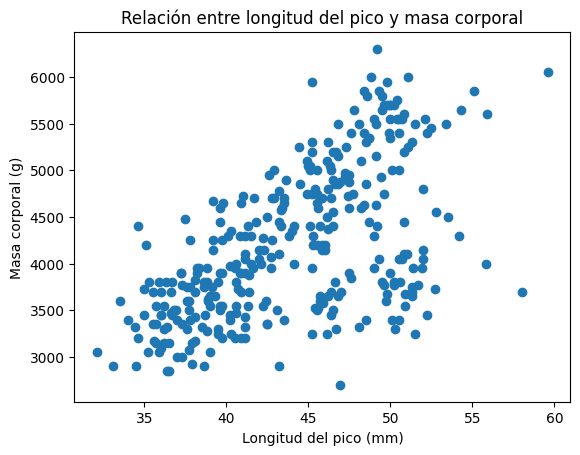

array([[1.        , 0.58945111],
       [0.58945111, 1.        ]])

In [ ]:
# punto 4
bill_length = df["bill_length_mm"]
body_mass = df["body_mass_g"]

bill_length.dropna(axis=0, inplace=True, ignore_index=True)
body_mass.dropna(axis=0, inplace=True, ignore_index=True)

plt.scatter(bill_length, body_mass)
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.title("Relación entre longitud del pico y masa corporal")
plt.show()

np.corrcoef(bill_length, body_mass)

In [ ]:
print("El coeficiente de correlación es:", np.corrcoef(bill_length, body_mass)[0, 1])

El coeficiente de correlación es: 0.589451110176949



**punto 9**

Existe una correlación positiva entre la longitud del pico y la masa corporal. Sin embargo, al no ser lo suficientemente cercano a 1 esa correlación puede no ser tan significativa. Además, no implica causalidad, es decir, dicha correlación no significa que una variable cause cambios en la otra.

In [ ]:
# punto 5
print("Las islas que hay son", [df.island.unique()[i] for i in range(len(df.island.unique()))])
print()
print(df.island.value_counts())   #value_counts() cuenta cuántas veces aparece cada objeto en la columna

isla_maxima = df.island.value_counts().idxmax() #idxmax() devuelve el índice del valor máximo de la columna
print()

print("La isla con mayor número de pinguinos es", isla_maxima)

Las islas que hay son ['Torgersen', 'Biscoe', 'Dream']

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64

La isla con mayor número de pinguinos es Biscoe


In [ ]:
# punto 6.

df.species.unique()

df_Chinstrap = df[df["species"]=="Chinstrap"] #Definimos una tabla que contiene sólo las filas que corresponden a la especie Chinstrap

desviacion_aleta_Chins = df_Chinstrap["flipper_length_mm"].std() #Calculamos la desviación estándar de la columna flipper_length_mm

print("La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es de:", f"{desviacion_aleta_Chins: .2f}", "mm")

La desviación estándar de la longitud de la aleta de los pingüinos de la especie Chinstrap es de:  7.13 mm


In [ ]:
# punto 7

pico_max = df.bill_length_mm.max() #devuelve el valor máximo de la columna bill_length_mm

indice = df.bill_length_mm.idxmax() #devuelve el índice del valor máximo de la columna
fila = df.loc[indice] #devuelve la fila del índice
especie = df.loc[indice].species #devuelve la especie del índice

print(f"El pingüino con el pico más largo está en la posición {indice} con una medida de {pico_max}mm y es de la especie {especie}.")

El pingüino con el pico más largo está en la posición 246 con una medida de 59.6mm y es de la especie Gentoo.


In [ ]:
# punto 8.

df_Adelie = df[df.species=="Adelie"] #tabla solo con la especie Adelie

sex_proportions = df_Adelie.sex.value_counts(normalize=True) #El argumento normalize=True en la función value_counts() calcula las proporciones de cada valor único en una columna en lugar de sus recuentos.

print(f"La proporción de machos y hembras de la especie adelie es \n{sex_proportions}")

print(f"El porcentaje de machos en la especie Adelie es de {sex_proportions.Male*100: .2f}%.")
print(f"El porcentaje de hembras en la especie Adelie es de {sex_proportions.Female*100: .2f}%.")

La proporción de machos y hembras de la especie adelie es 
sex
Male      0.5
Female    0.5
Name: proportion, dtype: float64
El porcentaje de machos en la especie Adelie es de  50.00%.
El porcentaje de hembras en la especie Adelie es de  50.00%.
